In [1]:

# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus_diabetic_patient.pkl')
data

,transcript
Sarah,https://www.diabetes.org.uk to support Diabet...
annabel,https://www.diabetes.org.uk to support Diabet...
catherine,https://www.diabetes.org.uk to support Diabet...
charlie,https://www.diabetes.org.uk to support Diabet...
chloe,https://www.diabetes.org.uk to support Diabet...
emma,https://www.diabetes.org.uk to support Diabet...
fatima,https://www.diabetes.org.uk to support Diabet...
helen,https://www.diabetes.org.uk to support Diabet...
jay,https://www.diabetes.org.uk to support Diabet...
jon,https://www.diabetes.org.uk to support Diabet...


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# !pip install textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
Sarah,https://www.diabetes.org.uk to support Diabet...,0.065152,0.208442
annabel,https://www.diabetes.org.uk to support Diabet...,0.041958,0.139860
catherine,https://www.diabetes.org.uk to support Diabet...,0.029899,0.204848
charlie,https://www.diabetes.org.uk to support Diabet...,0.060808,0.201212
chloe,https://www.diabetes.org.uk to support Diabet...,0.233224,0.548834
emma,https://www.diabetes.org.uk to support Diabet...,0.145455,0.309848
fatima,https://www.diabetes.org.uk to support Diabet...,0.057289,0.603806
helen,https://www.diabetes.org.uk to support Diabet...,0.065152,0.208442
jay,https://www.diabetes.org.uk to support Diabet...,0.054141,0.207879
jon,https://www.diabetes.org.uk to support Diabet...,0.060235,0.459727


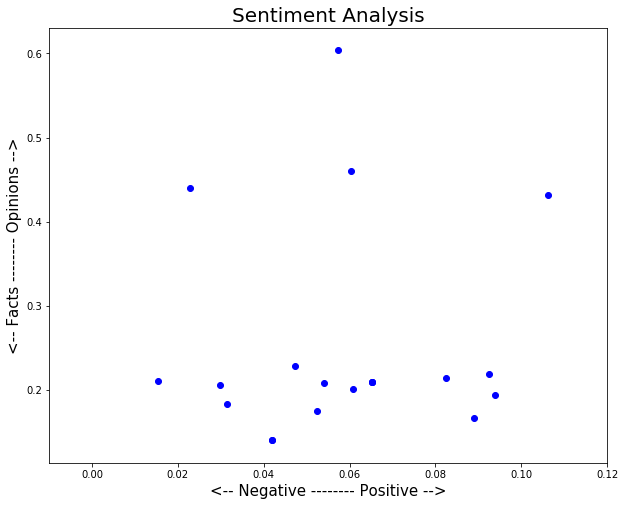

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, patient_names in enumerate(data.index):
    x = data.polarity.loc[patient_names]
    y = data.subjectivity.loc[patient_names]
    plt.scatter(x, y, color='blue')
   ## plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [6]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text_data(text, n=10):
    '''divide into 10 equal parts'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [8]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text_data(t)
    list_pieces.append(split)
    
list_pieces

[['https://www.diabetes.org.uk  to support Diabetes UK 0345 123 2399 Diabetes and Me   Search Savefor',
  ' later for later \n    Page saved! You can go back to this later in your Diabetes and Me\nClose\n Clo',
  "se Jez's story: how a lifestyle intervention changed my life Jez Joseph  shares experiences about ",
  'Emotions Know Your Risk Friends and family Diet, nutrition and active living  Diabetes UK and me B',
  'iggest challenge Fundraise with us What has helped me the most? Do you have a story about diabetes',
  " to help or encourage others? Snita's story: putting type 2 diabetes into remission and recovering",
  " from coronavirus symptoms Martin's story: Type 1 diabetes and the coronavirus outbreak Savefor la",
  'ter for later \n    Page saved! You can go back to this later in your Diabetes and Me\nClose\n Close ',
  'Share this page Opens a new window for Diabetes UK on facebook Opens a new window for Diabetes UK ',
  'on Twitter Opens a new window for Diabetes UK on youtub

In [9]:
# The list has 10 elements, one for each transcript
len(list_pieces)

22

In [10]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [11]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0,
  0.0,
  0.0,
  -0.13333333333333333,
  0.5,
  0.0,
  0.0,
  0.0,
  0.13636363636363635,
  0.13636363636363635],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.04545454545454545,
  0.06818181818181818,
  0.13636363636363635],
 [-0.3,
  0.0,
  0.0,
  0.13636363636363635,
  -0.1,
  0.0,
  0.0,
  0.0,
  0.13636363636363635,
  0.13636363636363635],
 [0.0,
  0.0,
  0.0,
  0.25,
  -0.13333333333333333,
  0.0,
  0.0,
  0.0,
  0.13636363636363635,
  0.13636363636363635],
 [0.053125,
  0.225,
  0.39615384615384613,
  -0.08461538461538462,
  0.43149999999999994,
  0.22734375000000004,
  0.36500000000000005,
  0.06428571428571428,
  0.13421052631578945,
  0.26570247933884306],
 [0.0,
  0.06818181818181818,
  0.13636363636363635,
  0.0909090909090909,
  0.55,
  0.1,
  0.4000000000000001,
  0.0,
  0.0,
  0.13636363636363635],
 [0.0,
  -0.03759920634920637,
  0.08714285714285717,
  0.27777777777777773,
  0.050000000000000024,
  0.03571428571428571,
  -0.031249999999999972,
  0.233333333

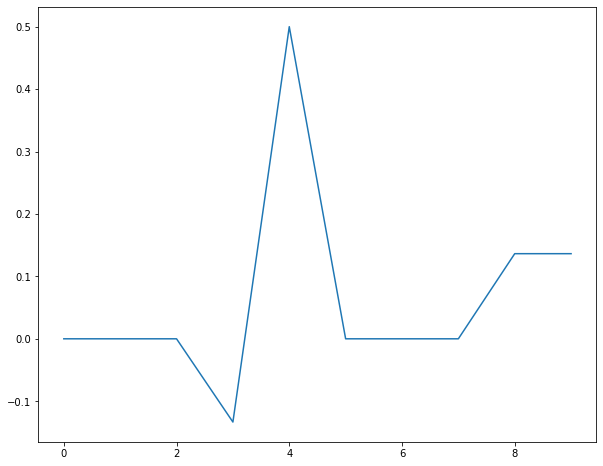

In [12]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
##plt.title(data['full_name'].index[0])
plt.show()

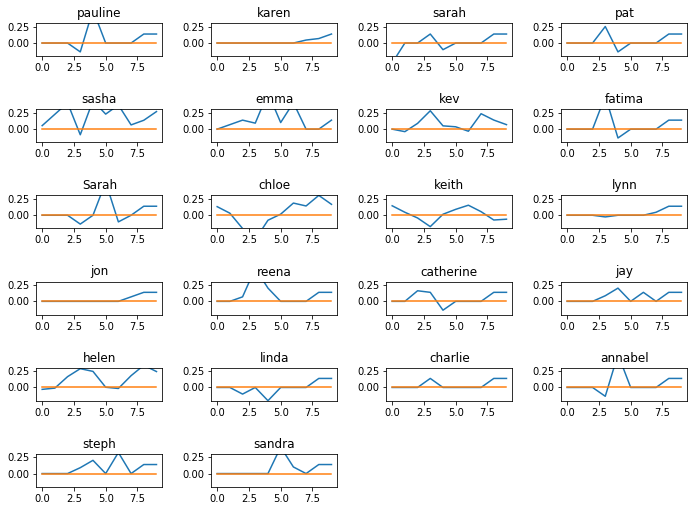

In [13]:
# Show the plot for all Patients
plt.rcParams['figure.figsize'] = [10, 12]
data['full_name'] =  ['pauline', 'karen','sarah','pat','sasha','emma','kev','fatima','Sarah','chloe','keith','lynn','jon','reena',
'catherine','jay','helen','linda','charlie','annabel','steph','sandra']
for index, patients_transcripts in enumerate(data.index):    
    plt.subplot(10, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.tight_layout(pad=2.0)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()